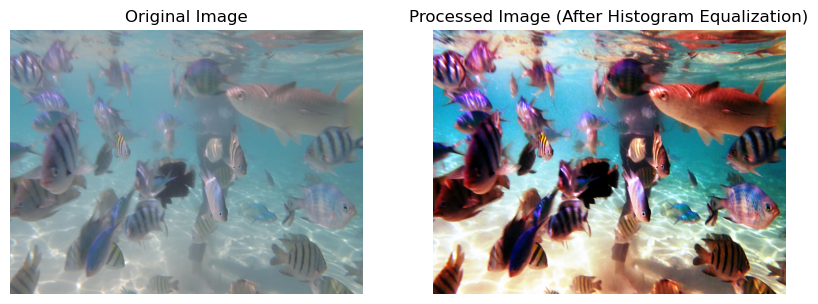

In [1]:
#HE
import cv2
import matplotlib.pyplot as plt

def RecoverHE(sceneRadiance):
    for i in range(3):
        sceneRadiance[:, :, i] = cv2.equalizeHist(sceneRadiance[:, :, i])
    return sceneRadiance

image_path = "./Dataset/raw-890/25_img_.png"
original_image = cv2.imread(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

processed_image = RecoverHE(original_image)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After Histogram Equalization)")
plt.axis("off")

plt.show()


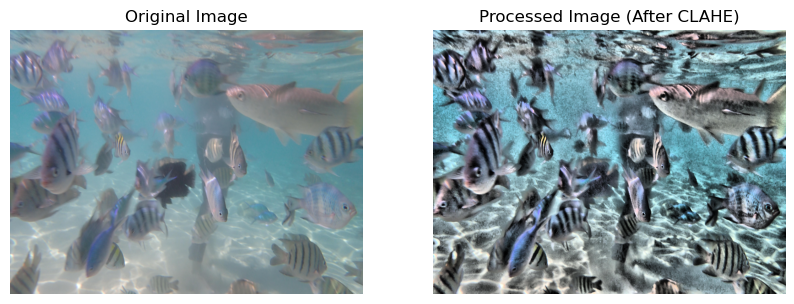

In [2]:
#CLAHE
import cv2
import numpy as np
import matplotlib.pyplot as plt

def clahe_hsv(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
    clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(20, 20))
    v = clahe.apply(v)
    hsv_img = np.dstack((h, s, v))
    rgb = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    return rgb

image_path = "./Dataset/raw-890/25_img_.png"
original_image = cv2.imread(image_path)
processed_image = clahe_hsv(original_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(processed_image)
plt.title("Processed Image (After CLAHE)")
plt.axis("off")
plt.show()

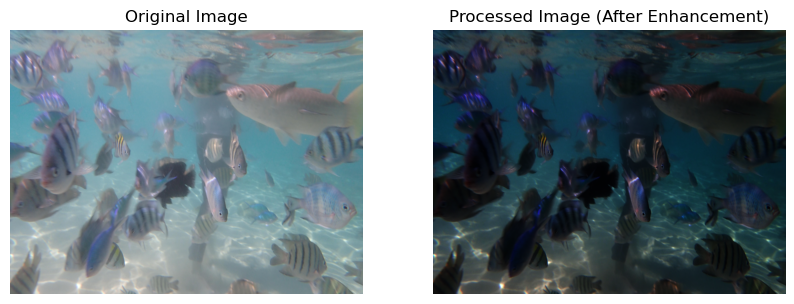

In [3]:
#Gamma Correction
import cv2
import numpy as np
import matplotlib.pyplot as plt

def RecoverGC(sceneRadiance):
    sceneRadiance = sceneRadiance / 255.0
    for i in range(3):
        sceneRadiance[:, :, i] = np.power(sceneRadiance[:, :, i] / float(np.max(sceneRadiance[:, :, i])), 3.2)
    sceneRadiance = np.clip(sceneRadiance * 255, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)
    return sceneRadiance

image_path = "./Dataset/raw-890/25_img_.png"
original_image = cv2.imread(image_path)
processed_image = RecoverGC(original_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After Enhancement)")
plt.axis("off")

plt.show()


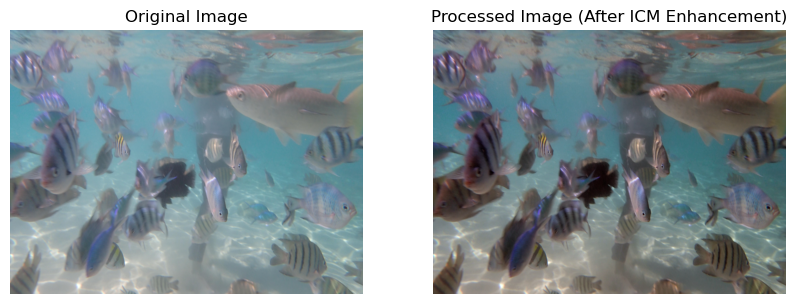

In [4]:
#ICM
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb

def global_stretching(img_L, height, width):
    I_min = np.min(img_L)
    I_max = np.max(img_L)
    I_mean = np.mean(img_L)

    array_Global_histogram_stretching_L = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            p_out = (img_L[i][j] - I_min) * ((1) / (I_max - I_min))
            array_Global_histogram_stretching_L[i][j] = p_out

    return array_Global_histogram_stretching_L

def stretching(img):
    height, width, _ = img.shape
    for k in range(3):
        Max_channel = np.max(img[:, :, k])
        Min_channel = np.min(img[:, :, k])
        for i in range(height):
            for j in range(width):
                img[i, j, k] = (img[i, j, k] - Min_channel) * (255 - 0) / (Max_channel - Min_channel) + 0
    return img

def HSVStretching(sceneRadiance):
    height, width, _ = sceneRadiance.shape
    img_hsv = rgb2hsv(sceneRadiance)
    h, s, v = cv2.split(img_hsv)
    img_s_stretching = global_stretching(s, height, width)
    img_v_stretching = global_stretching(v, height, width)

    labArray = np.zeros((height, width, 3), 'float64')
    labArray[:, :, 0] = h
    labArray[:, :, 1] = img_s_stretching
    labArray[:, :, 2] = img_v_stretching
    img_rgb = hsv2rgb(labArray) * 255

    return img_rgb

def sceneRadianceRGB(sceneRadiance):
    sceneRadiance = np.clip(sceneRadiance, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)
    return sceneRadiance

def RecoverICM(img1):
    img = stretching(img1)
    sceneRadiance = sceneRadianceRGB(img)
    sceneRadiance = HSVStretching(sceneRadiance)
    sceneRadiance = sceneRadianceRGB(sceneRadiance)
    return sceneRadiance


image_path = "./Dataset/raw-890/25_img_.png"
original_image = cv2.imread(image_path)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


processed_image = RecoverICM(original_image)


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image (After ICM Enhancement)")
plt.axis("off")

plt.show()
